#Case Study 1

In [62]:
import pandas as pd 
import numpy as np 
import io

from google.colab import files 
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['loan.csv']))
df

Saving loan.csv to loan.csv


Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 rows x 12 columns]

#Representing 'ApplicantIncome' in histogram

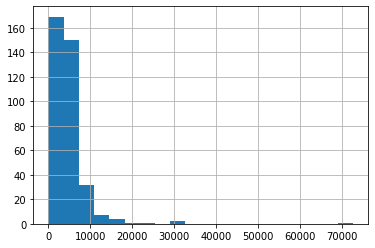

In [30]:
df['ApplicantIncome'].hist(bins=20)

#Representing 'ApplicantIncome' in boxplot

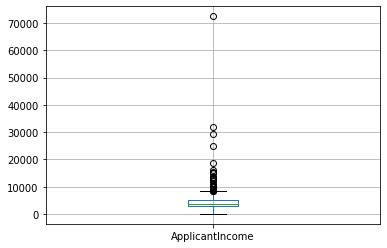

In [32]:
df.boxplot(column='ApplicantIncome')

#boxplot for 'ApplivatnIncome' and 'Education'

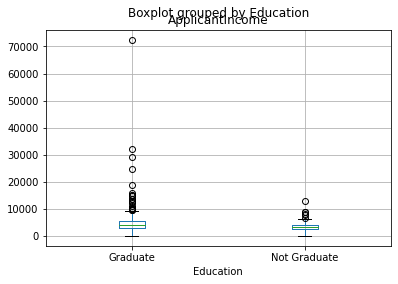

In [33]:
df.boxplot(column='ApplicantIncome',by='Education')

#boxplot for 'ApplivatnIncome' and 'Gender'

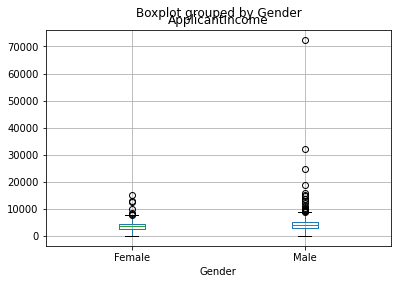

In [34]:
df.boxplot(column='ApplicantIncome',by='Gender')

#Categorical Variable Analysis

In [39]:
print('Frequency Table for Applicant Income:')
temp1=df['ApplicantIncome'].value_counts(ascending=True)
print(temp1)
print('Frequency Table for Married:')
temp2=df['Married'].value_counts(ascending=True)
print(temp2)

Frequency Table for Applicant Income:
2875     1
3909     1
13633    1
2083     1
2366     1
        ..
4333     4
7500     4
3333     5
5000     6
3500     6
Name: ApplicantIncome, Length: 314, dtype: int64
Frequency Table for Married:
No     134
Yes    233
Name: Married, dtype: int64


In [48]:
print('Frequency Table for Dependents:')
temp3=df['Dependents'].value_counts(ascending=True)
print(temp3)
print('Frequency Table for Married:')
temp4=df['Married'].value_counts(ascending=True)
print(temp4)

Frequency Table for Dependents:
3+     40
1      58
2      59
0     200
Name: Dependents, dtype: int64
Frequency Table for Married:
No     134
Yes    233
Name: Married, dtype: int64


In [49]:
print('Frequency Table for Loan History:')
temp5=df['Credit_History'].value_counts(ascending=True)
print(temp5)
print('Frequency Table for Gender:')
temp6=df['Gender'].value_counts(ascending=True)
print(temp6)

Frequency Table for Loan History:
0.0     59
1.0    279
Name: Credit_History, dtype: int64
Frequency Table for Gender:
Female     70
Male      286
Name: Gender, dtype: int64


#Representation of categorical variable analysis using matplotlib

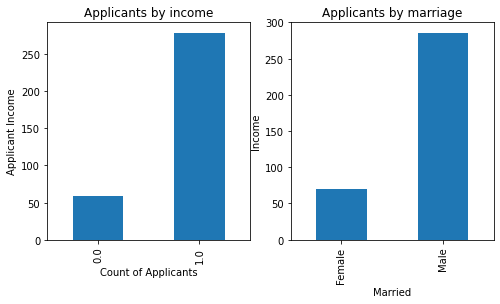

In [53]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_ylabel('Applicant Income')
ax1.set_xlabel('Count of Applicants')
ax1.set_title("Applicants by income")
temp1.plot(kind='bar')
print('')
ax2=fig.add_subplot(122)
ax2.set_xlabel('Married')
ax2.set_ylabel('Income')
ax2.set_title("Applicants by marriage")
temp2.plot(kind='bar')

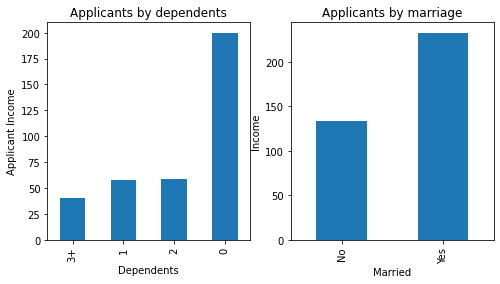

In [52]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_ylabel('Applicant Income')
ax1.set_xlabel('Dependents')
ax1.set_title("Applicants by dependents")
temp3.plot(kind='bar')
print('')
ax2=fig.add_subplot(122)
ax2.set_xlabel('Married')
ax2.set_ylabel('Income')
ax2.set_title("Applicants by marriage")
temp4.plot(kind='bar')

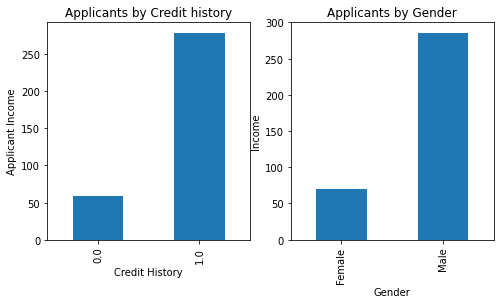

In [54]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_ylabel('Applicant Income')
ax1.set_xlabel('Credit History')
ax1.set_title("Applicants by Credit history")
temp5.plot(kind='bar')
print('')
ax2=fig.add_subplot(122)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Income')
ax2.set_title("Applicants by Gender")
temp6.plot(kind='bar')

#Checking missing values in Dataset

In [56]:
df.apply(lambda i: sum(i.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#All values other than 0 has dirty values so all are replaced with valid values

In [57]:
df['Gender'].value_counts().idxmax()

'Male'

In [59]:
df['Gender'].fillna('Male',inplace=True)
print(df['Gender'])

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
362    Male
363    Male
364    Male
365    Male
366    Male
Name: Gender, Length: 367, dtype: object


In [60]:
df['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [61]:
df['Dependents'].fillna('0',inplace=True)
print(df['Dependents'])

0       0
1       1
2       2
3       2
4       0
       ..
362    3+
363     0
364     0
365     0
366     0
Name: Dependents, Length: 367, dtype: object


In [62]:
df['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [64]:
df['Self_Employed'].fillna('No',inplace=True)
print(df['Self_Employed'])

0       No
1       No
2       No
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 367, dtype: object


In [65]:
a=df['LoanAmount'].mean()
df['LoanAmount'].fillna(a,inplace=True)
print(df['LoanAmount'])

0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64


In [67]:
df['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [68]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
print(df['Loan_Amount_Term'])

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    180.0
Name: Loan_Amount_Term, Length: 367, dtype: float64


In [69]:
df['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [70]:
df['Credit_History'].fillna(1.0,inplace=True)
print(df['Credit_History'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
362    1.0
363    1.0
364    1.0
365    1.0
366    1.0
Name: Credit_History, Length: 367, dtype: float64


In [71]:
df.apply(lambda i: sum(i.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#All missing values are cleared
#normalization next phase

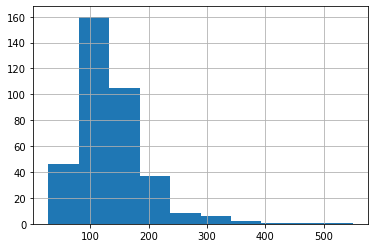

In [72]:
df['LoanAmount'].hist(bins=10)

#creating LoanAmount_log column to treate outliers and extreme values

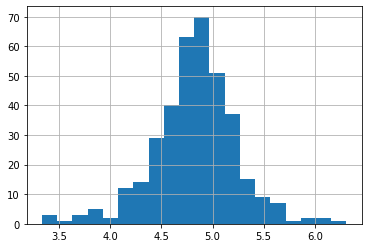

In [74]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [75]:
df

Loan_ID Gender Married  ... Credit_History Property_Area LoanAmount_log
0    LP001015   Male     Yes  ...            1.0         Urban       4.700480
1    LP001022   Male     Yes  ...            1.0         Urban       4.836282
2    LP001031   Male     Yes  ...            1.0         Urban       5.337538
3    LP001035   Male     Yes  ...            1.0         Urban       4.605170
4    LP001051   Male      No  ...            1.0         Urban       4.356709
..        ...    ...     ...  ...            ...           ...            ...
362  LP002971   Male     Yes  ...            1.0         Urban       4.727388
363  LP002975   Male     Yes  ...            1.0         Urban       4.744932
364  LP002980   Male      No  ...            1.0     Semiurban       4.836282
365  LP002986   Male     Yes  ...            1.0         Rural       5.062595
366  LP002989   Male      No  ...            1.0         Rural       4.584967

[367 rows x 13 columns]

#Loading already treated one such loan approval dataset from repository to predict the loan approval with Loan_status field

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"

names=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'] 
df = pd.read_csv(url, names=names)
print(df)

      Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001003    Male     Yes  ...              1         Rural           N
1    LP001005    Male     Yes  ...              1         Urban           Y
2    LP001006    Male     Yes  ...              1         Urban           Y
3    LP001008    Male      No  ...              1         Urban           Y
4    LP001011    Male     Yes  ...              1         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
475  LP002978  Female      No  ...              1         Rural           Y
476  LP002979    Male     Yes  ...              1         Rural           Y
477  LP002983    Male     Yes  ...              1         Urban           Y
478  LP002984    Male     Yes  ...              1         Urban           Y
479  LP002990  Female      No  ...              0     Semiurban           N

[480 rows x 13 columns]


In [2]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3]:
print(df.head(20))

     Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0   LP001003    Male     Yes  ...              1         Rural           N
1   LP001005    Male     Yes  ...              1         Urban           Y
2   LP001006    Male     Yes  ...              1         Urban           Y
3   LP001008    Male      No  ...              1         Urban           Y
4   LP001011    Male     Yes  ...              1         Urban           Y
5   LP001013    Male     Yes  ...              1         Urban           Y
6   LP001014    Male     Yes  ...              0     Semiurban           N
7   LP001018    Male     Yes  ...              1         Urban           Y
8   LP001020    Male     Yes  ...              1     Semiurban           N
9   LP001024    Male     Yes  ...              1         Urban           Y
10  LP001028    Male     Yes  ...              1         Urban           Y
11  LP001029    Male      No  ...              1         Rural           N
12  LP001030    Male     

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors  import  KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import LabelEncoder
var_mod     =      ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'] 
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

#Training and testing of 80% and 20% data respectively

#MODEL 1 (Evaluating the model and training the Model with 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History')

In [12]:
array = df.values 
X  =  array[:,6:11]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Prediction using logistic regression

In [14]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7708333333333334


#Prediction using Decision Tree

In [15]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.625


#Prediction using random decision forest

In [16]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.78125


#MODEL 1 - EXERCISE (training - 90%, testing-10%)

In [26]:
array = df.values 
X  =  array[:,6:11]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [27]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7291666666666666


#Decision Tree

In [28]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6875


#Random forest

In [29]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7291666666666666


#MODEL 1 - EXERCISE (training - 70%, testing-30%)

In [30]:
array = df.values 
X  =  array[:,6:11]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [31]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7916666666666666


#Decision Tree

In [32]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7152777777777778


#Random forest

In [33]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7638888888888888


#MODEL 1 - EXERCISE (training - 60%, testing-40%)

In [34]:
array = df.values 
X  =  array[:,6:11]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [35]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.796875


#Decision Tree

In [36]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.703125


#Random Forest

In [37]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7760416666666666


#MODEL 2 (Evaluating the model and training the Model with 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome')

In [17]:
array = df.values 
X  =  array[:,2:6]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Prediction using Logistic regression

In [18]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6354166666666666


#Prediction using decision tree

In [19]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6145833333333334


#Prediction using random decision forest

In [20]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.625


#MODEL 2 - EXERCISE (training - 90%, testing-10%)

In [38]:
array = df.values 
X  =  array[:,2:6]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [39]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6875


#Decision tree

In [40]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6875


#Random forest

In [41]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6875


#MODEL 2 - EXERCISE (training - 70%, testing-30%)

In [42]:
array = df.values 
X  =  array[:,2:6]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [43]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6527777777777778


#Decision tree

In [44]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6388888888888888


#Random forest

In [45]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))


0.6388888888888888


#MODEL 2 - EXERCISE (training - 60%, testing-40%)

In [46]:
array = df.values 
X  =  array[:,2:6]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [47]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6354166666666666


#Decision Tree

In [48]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6197916666666666


#Random forest

In [49]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.625


#MODEL 3 (Evaluating the model and training the Model with 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History',Property_Area', 'Loan_Status')

In [22]:
array = df.values 
X  =  array[:,5:12]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7) 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Prediction using Logistic regression

In [23]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7708333333333334


#Prediction using Decision tree

In [24]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.65625


#Prediction using random decision forest

In [25]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))


0.7395833333333334


#MODEL 3 - EXERCISE (training - 90%, testing-10%)

In [50]:
array = df.values 
X  =  array[:,5:12]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=7) 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic Regression

In [51]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7291666666666666


#Decision Tree

In [52]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.625


#Random forest

In [53]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7083333333333334


#MODEL 3 - EXERCISE (training - 70%, testing-30%)

In [54]:
array = df.values 
X  =  array[:,5:12]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7) 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic regression

In [55]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7916666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Decision Tree

In [56]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6875


#Random Forest

In [57]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7708333333333334


#MODEL 3 - EXERCISE (training - 60%, testing-40%)

In [58]:
array = df.values 
X  =  array[:,5:12]
Y  =  array[:,12] 
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=7) 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Logistic Regression

In [59]:
model = LogisticRegression() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8020833333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Decision Tree

In [60]:
model = DecisionTreeClassifier() 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7083333333333334


#Random forest

In [61]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7760416666666666


#CONCLUSION : For all Model 1,2 and 3 the best algorithm suitable is "LOGISTIC REGRESSION"